** 스마트워치 센서 데이터 기반 행동 분류 3일차 **
# --------- 과제6 : 행동 추론 ---------

### [미션0] 과제 이해하기
   * 단말기 개발팀에서 새로 출시하는 Fine-Watch에 헬스케어 기능을 추가 할 수있도록, Fine-Watch에서 수집하는 데이터를 분석해 행동을 분류할 수 있는 AI 모델과 중요 feature list를 전달해야 합니다.
   * all 데이터셋에서 6가지 행동분류 중 'WALKING_UPSTAIRS'를 분류하는 모델을 만들고 정확도 도출해 보세요.
   * 마지막으로 누적된 모델의 정확도(result)와 'WALKING_UPSTAIRS' 행동분류에 중요하게 작용하는 Feature 5개를 개발팀으로 전달해 주세요.
   

※ 과제완수 조건: Fine-Watch에 헬스케어 기능 추가를 위해 'WALKING_UPSTAIRS' 행동을 분류할 수 있는 AI 모델을 만들고 모델의 정확도와 데이터를 시각화 하세요.

----------

### [미션1] 데이터 불러오기

* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러리가 없을땐 !pip 명령어를 통해 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 2일차에 생성한 파일들을 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 모델별 결과 불러오기 -> 중요 feature 불러오기 -> test_data 불러오기 -> train_data 불러오기 -> 데이터 합치기 -> 데이터 인덱스 초기화 하기 -> X, Y 데이터 나누기 -> 학습 데이터 나누기

In [1]:
# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출
# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
# 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용
# XGBClassifier 알고리즘 사용을 위한 모듈 호출
# 진척도 상황을 확인하기 위한 tqdm 라이브러리 호출
# 저장한 모델 사용을 위한 joblib 라이브러리 호출
## 그외 라이브러리는 필요에 따라 호출해서 사용하세요.

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os
import joblib 
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from xgboost import XGBClassifier


In [2]:
# 모델별 결과 불러오기
## 모델별 정확도를 비교 할 수 있도록 결과 저장 파일을 불러 옵니다.
## 'data' 폴더에서 /result5.csv 파일을 불러와 result 변수에 할당 합니다.
## result 변수에 할당이 잘 되었는지 확인해 주세요. 

result = pd.read_csv('./data/result5.csv')
result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983003,0.984583
2,knn,train,0.954674,0.958345
3,xgb,train,0.988669,0.989470
4,hpt_xgb,train,0.990368,0.991052
5,hpt_xgb_150,train,0.990935,0.991562
6,hpt_xgb_50,train,0.985269,0.985278
7,hpt_xgb_top,train,0.991501,0.992040
8,test_hpt_xgb_top,test,0.985724,0.986275
9,all_hpt_xgb,test,0.996601,0.996906


In [3]:
# 중요 feature 불러오기
## 모델 정확도에 높은 영향을 미치는 feature 이름을 저장한 importance_top.pkl 파일을 불러와 importance_top에 저장 합니다.
## importance_top 변수에 할당이 잘 되었는지 확인해 주세요. 

importance_top = joblib.load('importance_top.pkl')
importance_top

0                 fBodyAccMag-mad()
1         tBodyGyroJerk-entropy()-X
2      fBodyAcc-bandsEnergy()-1,8.2
3             tBodyGyroJerk-mad()-X
4              tGravityAcc-mean()-X
                   ...             
137          tBodyAccMag-arCoeff()4
138               tBodyGyro-mad()-Y
139           tBodyGyroJerk-max()-Z
140                tBodyAcc-mad()-X
141         tGravityAcc-entropy()-Y
Name: feature_name, Length: 142, dtype: object

In [4]:
# test 데이터 불러오기
## 'data' 폴더에서 test_data.csv 파일을 불러와서 test_data 변수에 할당해 주세요.
## 잘 할당 되었는지 데이터를 확인해 주세요.

test_data = pd.read_csv('./data/test_data.csv')
test_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,22,SITTING
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,15,STANDING
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,22,WALKING
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,8,SITTING
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,0.278725,-0.015262,-0.106398,-0.993625,-0.982845,-0.974745,-0.993963,-0.981100,-0.974596,-0.939303,...,-0.874066,-0.054788,0.712975,0.300318,-0.319188,-0.857336,0.120184,0.119276,14,SITTING
1467,0.275803,-0.019257,-0.109078,-0.998614,-0.991621,-0.987403,-0.998813,-0.991503,-0.986802,-0.945442,...,-0.721050,0.076333,-0.021599,-0.277268,0.754011,-0.764185,0.212111,0.138595,16,STANDING
1468,0.240402,0.006361,-0.121377,-0.045805,0.189930,0.332664,-0.114706,0.157771,0.195271,0.210139,...,-0.615554,0.330378,-0.667635,0.806563,-0.850113,-0.639564,0.185363,0.260201,8,WALKING_DOWNSTAIRS
1469,0.135873,-0.020675,-0.116644,-0.960526,-0.955134,-0.985818,-0.963115,-0.971338,-0.988261,-0.946289,...,-0.422383,-0.048474,0.236761,-0.186581,0.396648,0.790877,-0.474618,-0.505953,19,LAYING


In [5]:
# train 데이터 불러오기
## 'data' 폴더에서 train_data.csv 파일을 불러와서 train_data 변수에 할당해 주세요.
## 잘 할당 되었는지 데이터를 확인해 주세요.

train_data = pd.read_csv('./data/train_data.csv')
train_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,21,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,15,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,19,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,6,WALKING_UPSTAIRS


In [6]:
# 데이터 합치기
## all_data 변수에 train 데이터셋과 test 데이터셋을 위/아래로 합쳐서 할당 합니다.


all_data = pd.concat([train_data, test_data])
all_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,0.278725,-0.015262,-0.106398,-0.993625,-0.982845,-0.974745,-0.993963,-0.981100,-0.974596,-0.939303,...,-0.874066,-0.054788,0.712975,0.300318,-0.319188,-0.857336,0.120184,0.119276,14,SITTING
1467,0.275803,-0.019257,-0.109078,-0.998614,-0.991621,-0.987403,-0.998813,-0.991503,-0.986802,-0.945442,...,-0.721050,0.076333,-0.021599,-0.277268,0.754011,-0.764185,0.212111,0.138595,16,STANDING
1468,0.240402,0.006361,-0.121377,-0.045805,0.189930,0.332664,-0.114706,0.157771,0.195271,0.210139,...,-0.615554,0.330378,-0.667635,0.806563,-0.850113,-0.639564,0.185363,0.260201,8,WALKING_DOWNSTAIRS
1469,0.135873,-0.020675,-0.116644,-0.960526,-0.955134,-0.985818,-0.963115,-0.971338,-0.988261,-0.946289,...,-0.422383,-0.048474,0.236761,-0.186581,0.396648,0.790877,-0.474618,-0.505953,19,LAYING


In [7]:
# 데이터 인덱스 초기화
## 데이터셋을 위아래로 합치면 인덱스 중복이 발생 합니다.
## 인덱스가 중복되지 않도록 인덱스를 리셋해 주세요.

all_data.reset_index(drop=True, inplace=True)
all_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.278725,-0.015262,-0.106398,-0.993625,-0.982845,-0.974745,-0.993963,-0.981100,-0.974596,-0.939303,...,-0.874066,-0.054788,0.712975,0.300318,-0.319188,-0.857336,0.120184,0.119276,14,SITTING
7348,0.275803,-0.019257,-0.109078,-0.998614,-0.991621,-0.987403,-0.998813,-0.991503,-0.986802,-0.945442,...,-0.721050,0.076333,-0.021599,-0.277268,0.754011,-0.764185,0.212111,0.138595,16,STANDING
7349,0.240402,0.006361,-0.121377,-0.045805,0.189930,0.332664,-0.114706,0.157771,0.195271,0.210139,...,-0.615554,0.330378,-0.667635,0.806563,-0.850113,-0.639564,0.185363,0.260201,8,WALKING_DOWNSTAIRS
7350,0.135873,-0.020675,-0.116644,-0.960526,-0.955134,-0.985818,-0.963115,-0.971338,-0.988261,-0.946289,...,-0.422383,-0.048474,0.236761,-0.186581,0.396648,0.790877,-0.474618,-0.505953,19,LAYING


### [미션2] 'WALKING_UPSTAIRS' 행동분류에 영향을 미치는 중요 feature 도출


* 개발팀에서 'WALKING_UPSTAIRS' 행동분류 기능을 개발할 수 있도록 데이터에서 특히 'WALKING_UPSTAIRS' 행동분류에만 영향을 많이 미치는 중요 feature 를 찾아주세요.


	- 실습순서: X, Y 데이터 나누기-> 학습 데이터 나누기 -> AI 모델링 및 결과 예측 -> 모델 성능 평가 -> 예측 결과 저장


In [8]:
# X, Y 데이터 나누기
## 모델 학습을 위해 feature(X) 데이터와 target(Y) 데이터를 나누어 주어야 합니다.
## target(Y)을 분리를 위해 all_data['Activity'] 값을 숫자로 변환 할 때 'WALKING_UPSTAIRS' 만 인식 할 수 있도록 숫자를 구성해야 합니다.
## [TIP]: {'STANDING':0, 'SITTING':0, 'LAYING':0, 'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':0}
## 변환된 결과를 all_y_map 변수에 할당 합니다. 
## all_data 데이터에서 2일차에서 선정한 중요도가 높은 feature 들만 골라 all_x 변수에 할당 합니다.
## 중요도가 높은 feature 들의 이름은 .pkl 파일에서 불러와 importance_top 변수에 저장되어 있습니다.

all_y_map = all_data['Activity'].map({'STANDING':0, 'SITTING':0, 'LAYING':0, 'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':0})
all_x = all_data[importance_top]


In [9]:
# 학습 데이터 나누기
## 학습에 필요한 all_x 와 all_y_map 데이터를 학습 7 : 검증 3 비율로 나누어 주세요.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 데이터를 할당받을 변수명: all_x_train, all_x_val, all_y_train, all_y_val

all_x_train, all_x_val, all_y_train, all_y_val = train_test_split(all_x,all_y_map,train_size=0.7,random_state=2023)



In [10]:
# AI 모델링 및 결과 예측
## XGBClassifier 알고리즘을 사용하여 walkingup_model 변수에 모델을 생성 및 초기화 합니다.
## 파라미터는 최종 조정 파라미터를 사용하고, random_state는 2023 으로 설정해 주세요.
## 모델이 생성되면 all_x_train, all_y_train 로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 all_x_val 데이터의 결과를 예측하여 walkingup_pred 변수에 할당 합니다.

walkingup_model = XGBClassifier(learning_rate=0.3, max_depth=2, random_state=2023)
walkingup_model.fit(all_x_train, all_y_train)
walkingup_pred = walkingup_model.predict(all_x_val)
walkingup_pred



array([0, 0, 0, ..., 0, 1, 0])

In [11]:
# walkingup_model 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print('accuracy_score: ',accuracy_score(all_y_val,walkingup_pred))
print('\n confusion_matrix: \n',confusion_matrix(all_y_val,walkingup_pred))
print('\n classification_report: \n',classification_report(all_y_val,walkingup_pred))


accuracy_score:  0.9986400725294651

 confusion_matrix: 
 [[1883    3]
 [   0  320]]

 classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1886
           1       0.99      1.00      1.00       320

    accuracy                           1.00      2206
   macro avg       1.00      1.00      1.00      2206
weighted avg       1.00      1.00      1.00      2206



In [12]:
# walkingup_xgb_model 예측결과 저장
## result 데이터프레임 12번 인덱스에 'walkingup_xgb'(모델명), 'all'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.

result.loc[12] = ['walkingup_xgb', 'all', accuracy_score(all_y_val,walkingup_pred), f1_score(all_y_val,walkingup_pred, average = 'macro')]
result


,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983003,0.984583
2,knn,train,0.954674,0.958345
3,xgb,train,0.988669,0.989470
4,hpt_xgb,train,0.990368,0.991052
5,hpt_xgb_150,train,0.990935,0.991562
6,hpt_xgb_50,train,0.985269,0.985278
7,hpt_xgb_top,train,0.991501,0.992040
8,test_hpt_xgb_top,test,0.985724,0.986275
9,all_hpt_xgb,test,0.996601,0.996906


### [미션3] 'WORKING_UPSTAIRS' 행동분류 모델 개선
* feature selection 기법을 상용하여 'WORKING_UPSTAIRS' 행동분류 모델의 정확도를 개선해 주세요.

	- 실습순서: feature 명 데이터 파일 생성 -> 데이터 분할/가공 -> 최적의 Feature Selection 찾기 -> 상위 5개 feature 데이터 시각화 -> 센서별 중요도 시각화 

In [13]:
# feature 명 데이터 파일 생성
## up_importance_sort 데이터프레임 변수를 생성 및 초기화 합니다.

up_importance_sort = pd.DataFrame()


In [14]:
# feature 명 할당
## up_importance_sort['feature_name'] 열에 walkingup_model 학습에 사용한 all_x 데이터프레임의 모든 feature 명을 할당 합니다.

up_importance_sort['feature_name'] = all_x.columns
up_importance_sort

,feature_name
0,fBodyAccMag-mad()
1,tBodyGyroJerk-entropy()-X
2,"fBodyAcc-bandsEnergy()-1,8.2"
3,tBodyGyroJerk-mad()-X
4,tGravityAcc-mean()-X
...,...
137,tBodyAccMag-arCoeff()4
138,tBodyGyro-mad()-Y
139,tBodyGyroJerk-max()-Z
140,tBodyAcc-mad()-X


In [15]:
# feature importances 할당
## up_importance_sort['feature_importance'] 열에 walkingup_model 모델의 feature_importances 를 할당해 줍니다.
## 참고함수: feature_importances_

up_importance_sort['feature_importance'] = walkingup_model.feature_importances_
up_importance_sort

,feature_name,feature_importance
0,fBodyAccMag-mad(),0.024077
1,tBodyGyroJerk-entropy()-X,0.000000
2,"fBodyAcc-bandsEnergy()-1,8.2",0.080648
3,tBodyGyroJerk-mad()-X,0.000385
4,tGravityAcc-mean()-X,0.000173
...,...,...
137,tBodyAccMag-arCoeff()4,0.000000
138,tBodyGyro-mad()-Y,0.001805
139,tBodyGyroJerk-max()-Z,0.002794
140,tBodyAcc-mad()-X,0.000000


In [16]:
# 중요도 순으로 인덱스 재 정렬
## up_importance_sort 데이터프레임을 up_importance_sort['feature_importance'] 순으로 내림차순 정열 합니다.
## 정렬 후 결과를 확인 합니다.


up_importance_sort.sort_values(by='feature_importance', ascending=False, inplace=True)
up_importance_sort

,feature_name,feature_importance
9,"tGravityAcc-arCoeff()-Z,1",0.173569
16,"tGravityAcc-arCoeff()-Y,1",0.082616
2,"fBodyAcc-bandsEnergy()-1,8.2",0.080648
21,fBodyAccJerk-maxInds-Z,0.073737
90,"tGravityAcc-arCoeff()-Z,2",0.072772
...,...,...
72,fBodyAcc-std()-X,0.000000
1,tBodyGyroJerk-entropy()-X,0.000000
66,"fBodyGyro-bandsEnergy()-17,24",0.000000
61,tBodyAccMag-max(),0.000000


In [17]:
# 데이터 인덱스 초기화
## 인덱스가 순서대로 나열 되도록 인덱스를 리셋해 주세요.

up_importance_sort.reset_index(drop=True, inplace=True)
up_importance_sort

,feature_name,feature_importance
0,"tGravityAcc-arCoeff()-Z,1",0.173569
1,"tGravityAcc-arCoeff()-Y,1",0.082616
2,"fBodyAcc-bandsEnergy()-1,8.2",0.080648
3,fBodyAccJerk-maxInds-Z,0.073737
4,"tGravityAcc-arCoeff()-Z,2",0.072772
...,...,...
137,fBodyAcc-std()-X,0.000000
138,tBodyGyroJerk-entropy()-X,0.000000
139,"fBodyGyro-bandsEnergy()-17,24",0.000000
140,tBodyAccMag-max(),0.000000


In [18]:
# 최적의 Feature Selection 찾기
## acc 데이터 프레임을 생성 및 초기화 합니다.(컬럼 지정: columns=['accuracy_score'])
## 전체 feature는 561개에서 도출한 Top feature 개수를(예: 141개) 선별 했기에 feature를 1개 ~ Top feature 개수까지 모델링과 결과를 도출 합니다.
## for 문을 사용해 중요도 상위 feature 1개 모델링부터 Top feature 개수까지 순차적 모델링 실행 후 각 accuracy_score 결과를 acc 변수에 누적 합니다.
## [TIP] tqdm: tqdm은 반복문에서 현재 계산되고 있는 부분의 퍼센테이지를 시각적으로 나태내어 줍니다.
## [TIP] tqdm 사용 예제: for i in range(10) -> for i in tqdm(range(10)):
 
acc = pd.DataFrame(columns=['accuracy_score'])

for i in tqdm(range(len(up_importance_sort))):

    importance_n = up_importance_sort['feature_name'][:i+1]

    x_train_n = all_x_train[importance_n]
    x_val_n = all_x_val[importance_n]

    xgb_n_model = XGBClassifier(learning_rate=0.3, max_depth=2, random_state=2023)
    xgb_n_model.fit(x_train_n, all_y_train)
    xgb_n_pred = xgb_n_model.predict(x_val_n)
    
    acc.loc[i] = accuracy_score(all_y_val,xgb_n_pred)

acc

100%|██████████| 142/142 [02:04<00:00,  1.14it/s]


,accuracy_score
0,0.851315
1,0.871714
2,0.952856
3,0.956482
4,0.957842
...,...
137,0.998640
138,0.998640
139,0.998640
140,0.998640


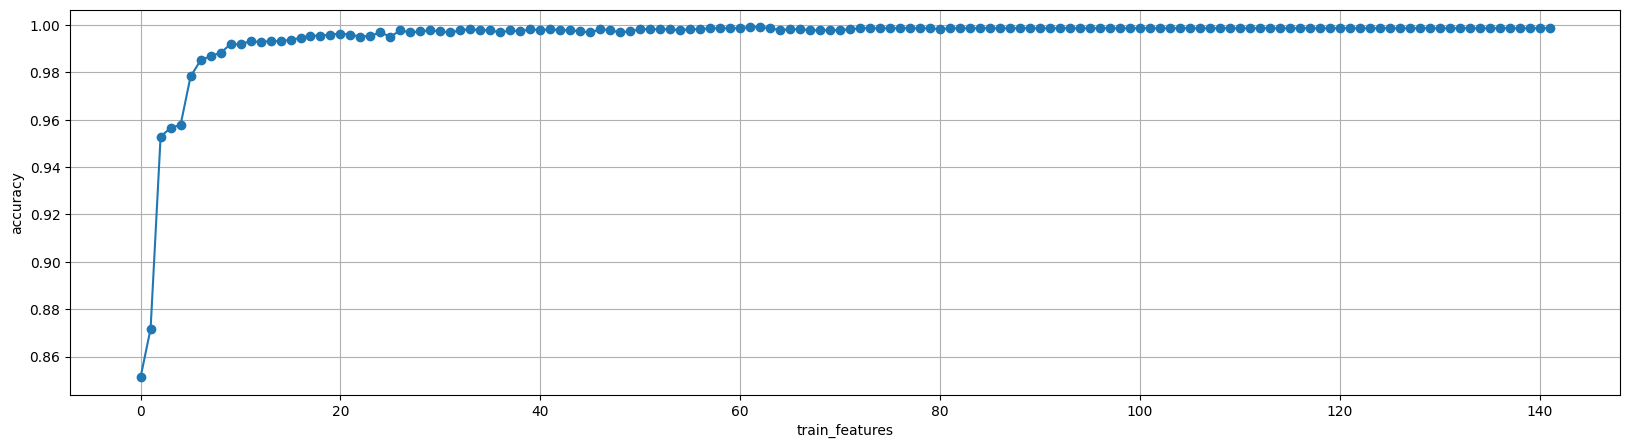

In [19]:
# accuracy_score 누적 결과 시각화
## accuracy_score 누적한 acc 변수를 plot으로 시각화 합니다.


plt.figure(figsize=(20,5))
plt.plot(acc, marker='o')
plt.xlabel('train_features')
plt.ylabel('accuracy')
plt.grid()
plt.show()


In [20]:
# 최고 정확도 Feature 개수 찾기
## acc 변수를 accuracy_score 기준 내림차순으로 정렬 합니다.(인덱스 재설정X)
## 인덱스 번호는 누적 학습된 feature의 개수 입니다.
## accuracy_score 값으로 내림차순 정렬 후 이 가장 첫번째 행의 인덱스 번호가 가장 정확도가 좋은 feature 개수를 뜻합니다.

acc.sort_values(by = 'accuracy_score', ascending=False, inplace=True)
acc


,accuracy_score
61,0.999093
62,0.999093
141,0.998640
86,0.998640
88,0.998640
...,...
4,0.957842
3,0.956482
2,0.952856
1,0.871714


In [21]:
# 최고 정확도 Feature명 저장
## acc 결과에서 확인한 가장 성능좋은 결과를 내는 feature의 개수 만큼 importance_sort['feature_name']를 슬라이싱 하여 
## feature의 이름을 up_importance_top 변수에 할당 합니다.
## 정확도 최고치 인덱스 값 +1 해서 슬라이싱 하세요.
## [TIP] 슬라이싱 할때 [:1] -> feature 0번 까지 짤림, [:100] -> feature 99번 까지 짤림

up_importance_top = up_importance_sort['feature_name'][:acc.index[0]+1]
up_importance_top


0         tGravityAcc-arCoeff()-Z,1
1         tGravityAcc-arCoeff()-Y,1
2      fBodyAcc-bandsEnergy()-1,8.2
3            fBodyAccJerk-maxInds-Z
4         tGravityAcc-arCoeff()-Z,2
                  ...              
57    fBodyAcc-bandsEnergy()-9,16.1
58              fBodyGyro-maxInds-X
59    fBodyGyro-bandsEnergy()-1,8.2
60        tGravityAcc-arCoeff()-Z,4
61        fBodyAccJerk-skewness()-X
Name: feature_name, Length: 62, dtype: object

In [22]:
# 훈련 데이터 생성
## all_x_train 데이터에서 위에서 up_importance_top에 할당한 feature 들의 데이터를 x_train_top 변수에 할당해 줍니다.
## all_x_val 데이터에서 위에서 up_importance_top에 할당한 feature 들의 데이터를 x_val_top 변수에 할당해 줍니다.

all_x_train_top = all_x_train[up_importance_top]
all_x_val_top = all_x_val[up_importance_top]


In [23]:
# AI 모델링 및 결과 예측
## XGBClassifier 알고리즘을 사용하여 walkingup_top_model 변수에 모델을 생성 및 초기화 합니다.
## 파라미터는 최종 조정 파라미터를 사용하고, random_state는 2023 으로 설정해 주세요.
## 모델이 생성되면 all_x_train_top, all_y_train 로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 all_x_val_top 데이터의 결과를 예측하여 walkingup_pred 변수에 할당 합니다.


walkingup_top_model = XGBClassifier(learning_rate=0.3, max_depth=2, random_state=2023)
walkingup_top_model.fit(all_x_train_top, all_y_train)
walkingup_top_pred = walkingup_top_model.predict(all_x_val_top)
walkingup_top_pred



array([0, 0, 0, ..., 0, 1, 0])

In [24]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(all_y_val,walkingup_top_pred))
print('\n confusion_matrix: \n',confusion_matrix(all_y_val,walkingup_top_pred))
print('\n classification_report: \n',classification_report(all_y_val,walkingup_top_pred))



accuracy_score:  0.99909338168631

 confusion_matrix: 
 [[1884    2]
 [   0  320]]

 classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1886
           1       0.99      1.00      1.00       320

    accuracy                           1.00      2206
   macro avg       1.00      1.00      1.00      2206
weighted avg       1.00      1.00      1.00      2206



In [25]:
# walkingup_top_model 예측결과 저장
## result 데이터프레임 13번 인덱스에 'walkingup_top'(모델명), 'all'(검증 데이터명), accuracy_score 결과, f1_score 결과 를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
## 예측 결과가 잘 할당 되었는지 확인해 주세요.

result.loc[13] = ['walkingup_top', 'all', accuracy_score(all_y_val,walkingup_top_pred), f1_score(all_y_val,walkingup_top_pred, average = 'macro')]
result



,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983003,0.984583
2,knn,train,0.954674,0.958345
3,xgb,train,0.988669,0.989470
4,hpt_xgb,train,0.990368,0.991052
5,hpt_xgb_150,train,0.990935,0.991562
6,hpt_xgb_50,train,0.985269,0.985278
7,hpt_xgb_top,train,0.991501,0.992040
8,test_hpt_xgb_top,test,0.985724,0.986275
9,all_hpt_xgb,test,0.996601,0.996906


### [미션4] 'WORKING_UPSTAIRS' 분류에 영향을 미치는 'sensor' 찾기

* 'WORKING_UPSTAIRS' 분류에 가장 영향 많이 미치는 상위 20개의 sensor 그룹을 찾아 시각화 하세요

	- 실습순서: 그룹 데이터 불러오기 -> 데이터 프레임 merge 하기 -> 데이터 그룹화 ->  sensor 별 중요도 재정렬  -> sensor 별 중요도 시각화

In [26]:
# features.csv 파일 불러오기
## 'data'폴더에서 features.csv 파일을 읽어와 feature_group 변수에 할당 하세요.
## 변수에 할당이 잘 되었는지 확인해 주세요. 

feature_group =pd.read_csv('./data/features.csv')


In [27]:
# 데이터프레임 merge 
## merge_df 변수를 데이터프레임 타입으로 생성 및 초기화 합니다.
## feature_group 변수와 up_importance_sort 변수를 merge 하여 merge_df 할당 합니다.
## 데이터가 잘 할당 되었나 merge_df 데이터를 확인 합니다.

merge_df = pd.DataFrame()
merge_df = pd.merge(feature_group, up_importance_sort)
merge_df


,sensor,agg,axis,feature_name,feature_importance
0,tBodyAcc,std(),X,tBodyAcc-std()-X,0.000000
1,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000000
2,tBodyAcc,std(),Z,tBodyAcc-std()-Z,0.000000
3,tBodyAcc,mad(),X,tBodyAcc-mad()-X,0.000000
4,tBodyAcc,mad(),Y,tBodyAcc-mad()-Y,0.000000
...,...,...,...,...,...
139,fBodyBodyAccJerkMag,min(),NaN,fBodyBodyAccJerkMag-min(),0.000000
140,fBodyBodyAccJerkMag,skewness(),NaN,fBodyBodyAccJerkMag-skewness(),0.001058
141,fBodyBodyGyroMag,meanFreq(),NaN,fBodyBodyGyroMag-meanFreq(),0.001383
142,fBodyBodyGyroJerkMag,std(),NaN,fBodyBodyGyroJerkMag-std(),0.000000


In [28]:
# 데이터 그룹화
## merge_df 변수를 'sensor' 기준으로 그룹화 하고 'feature_importance' 열의 데이터를 같은 'sensor' 그룹끼리 더해 줍니다.
## groupby 함수는 데이터프레임을 그룹으로 묶으면서 필요한 계산을 동시에 수행할 수 있습니다.
## [TIP] 변수.groupby(by='그룹기준열')['연산 할 열'].연산메서드()


sensor_sum = merge_df.groupby(by='sensor')['feature_importance'].sum()
sensor_sum



sensor
angle                   0.005976
fBodyAcc                0.166977
fBodyAccJerk            0.126140
fBodyAccMag             0.027051
fBodyBodyAccJerkMag     0.029448
fBodyBodyGyroJerkMag    0.000000
fBodyBodyGyroMag        0.001383
fBodyGyro               0.093512
tBodyAcc                0.032077
tBodyAccJerk            0.019303
tBodyAccMag             0.020223
tBodyGyro               0.055459
tBodyGyroJerk           0.006747
tBodyGyroJerkMag        0.000000
tBodyGyroMag            0.003449
tGravityAcc             0.436199
Name: feature_importance, dtype: float32

In [29]:
# sensor 중요도 재 정렬
## sensor_sum 데이터를 내림차순으로 정렬 후 sensor_sort 변수에 할당합니다.
## sensor_sum 을 데이터프레임 으로 생성했을 경우 기준(by=)을 지정해 주어야 합니다.

sensor_sort = sensor_sum.sort_values(ascending=False)
sensor_sort

sensor
tGravityAcc             0.436199
fBodyAcc                0.166977
fBodyAccJerk            0.126140
fBodyGyro               0.093512
tBodyGyro               0.055459
tBodyAcc                0.032077
fBodyBodyAccJerkMag     0.029448
fBodyAccMag             0.027051
tBodyAccMag             0.020223
tBodyAccJerk            0.019303
tBodyGyroJerk           0.006747
angle                   0.005976
tBodyGyroMag            0.003449
fBodyBodyGyroMag        0.001383
fBodyBodyGyroJerkMag    0.000000
tBodyGyroJerkMag        0.000000
Name: feature_importance, dtype: float32

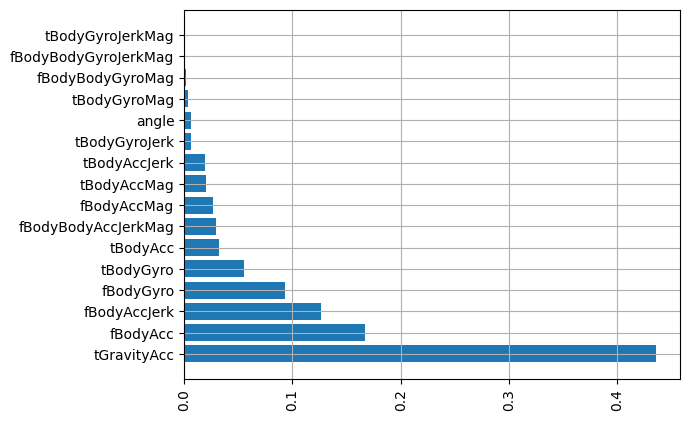

In [30]:
# 센서별 중요도 시각화
# sensor 별 중요도를 수평막대 그래프로 시각화 합니다.

plt.barh(y=sensor_sort.index, width=sensor_sort)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

# sensor_sort가 데이터프레임 시
# plt.barh(data = sensor_sort, y=sensor_sort.index, width='feature_importance')
# plt.xticks(rotation = 90)
# plt.grid()
# plt.show()

### [미션5] 최종결과 저장


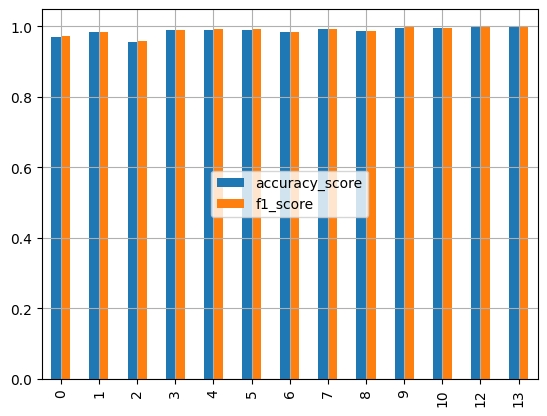

In [31]:
# 최종결과 결과 시각화
# 모델 별 accuracy_score, f1_score 지수를 수직 그래프로 시각화 하세요.

result.plot(kind='bar')
plt.grid()
plt.legend(loc='center')
plt.show()

In [32]:
# 최종결과 저장
## 최종 결과(result)를 'final_result.csv' 파일로 저장해 주세요.
## 영향도가 높은 feature 들의 이름을 모아놓은 변수를 'up_importance_top.csv' 파일로 저장해 주세요.


result.to_csv("final_result.csv")
up_importance_top.to_csv("up_importance_top.csv")



----------
----------

### [도전미션1]  'WORKING_UPSTAIRS' 분류에 영향을 미치는 상위 20 agg 찾기

* 앞서 'WORKING_UPSTAIRS' 분류에 영향을 미치는 'sensor'를 찾아보았습니다.
* 도전미션1 에서는 'WORKING_UPSTAIRS' 분류에 가장 영향을 많이 미치는 'agg'(aggrigation) 을 찾아 보겠습니다.

	- 실습순서: 데이터 그룹화 -> 데이터 재정렬 -> Top20 agg 시각화

In [33]:
# 데이터 그룹화
## merge_df 변수를 ['sensor','agg'] 기준으로 그룹화 하면서 'feature_importance' 열의 데이터를 더해 줍니다.
## groupby 함수는 데이터프레임을 그룹으로 묶으면서 필요한 계산을 동시에 수행할 수 있습니다.


sensor_agg_sum = merge_df.groupby(['sensor','agg'])['feature_importance'].sum()
sensor_agg_sum



sensor       agg          
angle        Y                0.005976
fBodyAcc     bandsEnergy()    0.112814
             kurtosis()       0.000000
             max()            0.053779
             skewness()       0.000000
                                ...   
tGravityAcc  mad()            0.000000
             max()            0.000000
             mean()           0.010505
             min()            0.062033
             sma()            0.000007
Name: feature_importance, Length: 80, dtype: float32

In [34]:
# sensor_agg 중요도 별 데이터 재정렬
## sensor_agg_sum 데이터를 내림차순으로 정렬 후 sensor_agg_sort 변수에 할당합니다.


sensor_agg_sort = sensor_agg_sum.sort_values(ascending=False)
sensor_agg_sort

# sensor_agg_sort 변수를 데이터프레임으로 생성시
# sensor_agg_sort = sensor_agg_sum.sort_values(by='feature_importance', ascending=False)
# sensor_agg_sort

sensor               agg          
tGravityAcc          arCoeff()        0.360341
fBodyAcc             bandsEnergy()    0.112814
fBodyAccJerk         maxInds          0.073737
tGravityAcc          min()            0.062033
fBodyAcc             max()            0.053779
                                        ...   
tBodyAccJerk         mean()           0.000000
fBodyAccMag          meanFreq()       0.000000
tBodyGyro            arCoeff()        0.000000
fBodyBodyAccJerkMag  min()            0.000000
tBodyAcc             arCoeff()        0.000000
Name: feature_importance, Length: 80, dtype: float32

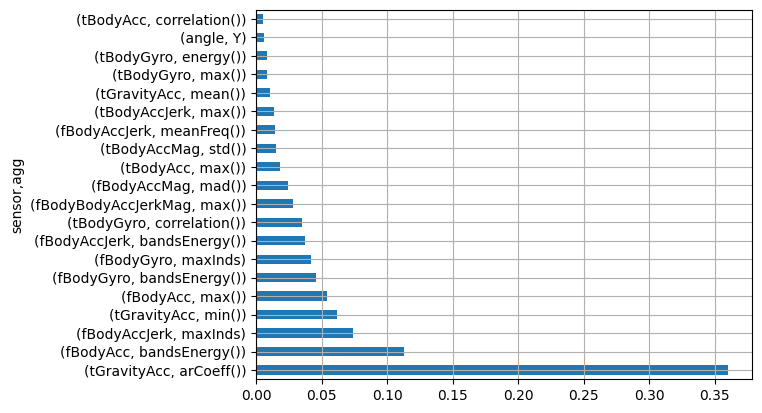

In [35]:
# 중요도 Top20 acc 시각화
## 중요도가 높은 센서 20개의 중요도를 수평 막대그래프로 시각화 합니다.

sensor_agg_sort[:20].plot(kind='barh')
plt.grid()
plt.show()

----------
----------

### [도전미션2]  'sensor'를 구성하고있는 'agg' 시각화

* 'WORKING_UPSTAIRS' 분류에 영향을 미치는 'sensor'를 구성하고 있는 'agg'와 각 'sensor' 별 'agg'의 크기를 시각화 해보세요

	- 실습순서: 데이터 재구조화 -> sensor 별 합계 재정렬 -> 재정렬 기준열 제거 ->  누적 막대 그래프 시각화

In [36]:
# sensor_agg_sort 데이터 재 구조화
# sensor_agg_sort 데이터의 'agg'열의 고유값을 sensor_agg_sort 데이터의 컬럼으로 변환(재구조화) 합니다. 
# 재구조화 한 데이터를 acc 변수에 할당 합니다.
# 참고함수: unstack()

acc = sensor_agg_sort.unstack()
acc



agg,Y,arCoeff(),arCoeff()1,arCoeff()4,bandsEnergy(),correlation(),energy(),entropy(),iqr(),kurtosis(),mad(),max(),maxInds,mean(),meanFreq(),min(),skewness(),sma(),std()
sensor,,,,,,,,,,,,,,,,,,,
angle,0.005976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fBodyAcc,NaN,NaN,NaN,NaN,0.112814,NaN,NaN,NaN,NaN,0.0,NaN,0.053779,NaN,NaN,NaN,NaN,0.000000,NaN,0.000385
fBodyAccJerk,NaN,NaN,NaN,NaN,0.037389,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,0.073737,0.000267,0.014123,NaN,0.000624,NaN,0.000000
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024077,NaN,0.001593,NaN,0.000000,NaN,NaN,NaN,0.001382
fBodyBodyAccJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028390,NaN,NaN,NaN,0.000000,0.001058,NaN,NaN
fBodyBodyGyroJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
fBodyBodyGyroMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001383,NaN,NaN,NaN,NaN
fBodyGyro,NaN,NaN,NaN,NaN,0.045848,NaN,NaN,0.000000,NaN,NaN,0.000000,0.005299,0.041937,0.000000,0.000429,NaN,NaN,NaN,NaN
tBodyAcc,NaN,0.000000,NaN,NaN,NaN,0.005692,0.001077,0.003016,0.000089,NaN,0.000000,0.018072,NaN,NaN,NaN,0.004132,NaN,NaN,0.000000


In [37]:
# 센서별 합계 재정렬
## acc 데이터의 각 센서의 행 기준(axis=1) 모든 값을 더해서 acc['sort'] 에 할당 합니다.
## 할당 후 acc 데이터를 acc['sort'] 열의 값 기준으로 내림차순으로 정렬 합니다.
## 정렬 후 데이터를 확인 합니다.


acc['sort'] = acc.sum(axis=1)
acc.sort_values(by = 'sort', ascending = False, inplace=True)
acc


agg,Y,arCoeff(),arCoeff()1,arCoeff()4,bandsEnergy(),correlation(),energy(),entropy(),iqr(),kurtosis(),mad(),max(),maxInds,mean(),meanFreq(),min(),skewness(),sma(),std(),sort
sensor,,,,,,,,,,,,,,,,,,,,
tGravityAcc,NaN,0.360341,NaN,NaN,NaN,0.000000,0.002719,0.000000,0.000595,NaN,0.000000,0.000000,NaN,0.010505,NaN,0.062033,NaN,0.000007,NaN,0.436199
fBodyAcc,NaN,NaN,NaN,NaN,0.112814,NaN,NaN,NaN,NaN,0.0,NaN,0.053779,NaN,NaN,NaN,NaN,0.000000,NaN,0.000385,0.166977
fBodyAccJerk,NaN,NaN,NaN,NaN,0.037389,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,0.073737,0.000267,0.014123,NaN,0.000624,NaN,0.000000,0.126140
fBodyGyro,NaN,NaN,NaN,NaN,0.045848,NaN,NaN,0.000000,NaN,NaN,0.000000,0.005299,0.041937,0.000000,0.000429,NaN,NaN,NaN,NaN,0.093512
tBodyGyro,NaN,0.000000,NaN,NaN,NaN,0.035331,0.008173,NaN,0.001661,NaN,0.001805,0.008489,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.055459
tBodyAcc,NaN,0.000000,NaN,NaN,NaN,0.005692,0.001077,0.003016,0.000089,NaN,0.000000,0.018072,NaN,NaN,NaN,0.004132,NaN,NaN,0.000000,0.032077
fBodyBodyAccJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028390,NaN,NaN,NaN,0.000000,0.001058,NaN,NaN,0.029448
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024077,NaN,0.001593,NaN,0.000000,NaN,NaN,NaN,0.001382,0.027051
tBodyAccMag,NaN,NaN,0.004780,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.015443,0.020223


In [38]:
# 정렬 기준열 제거
# 센서별 정렬을 완료 했으므로 acc 변수에서 acc['sort']열을 삭제 합니다.


acc.drop('sort', axis=1, inplace=True)
acc



agg,Y,arCoeff(),arCoeff()1,arCoeff()4,bandsEnergy(),correlation(),energy(),entropy(),iqr(),kurtosis(),mad(),max(),maxInds,mean(),meanFreq(),min(),skewness(),sma(),std()
sensor,,,,,,,,,,,,,,,,,,,
tGravityAcc,NaN,0.360341,NaN,NaN,NaN,0.000000,0.002719,0.000000,0.000595,NaN,0.000000,0.000000,NaN,0.010505,NaN,0.062033,NaN,0.000007,NaN
fBodyAcc,NaN,NaN,NaN,NaN,0.112814,NaN,NaN,NaN,NaN,0.0,NaN,0.053779,NaN,NaN,NaN,NaN,0.000000,NaN,0.000385
fBodyAccJerk,NaN,NaN,NaN,NaN,0.037389,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,0.073737,0.000267,0.014123,NaN,0.000624,NaN,0.000000
fBodyGyro,NaN,NaN,NaN,NaN,0.045848,NaN,NaN,0.000000,NaN,NaN,0.000000,0.005299,0.041937,0.000000,0.000429,NaN,NaN,NaN,NaN
tBodyGyro,NaN,0.000000,NaN,NaN,NaN,0.035331,0.008173,NaN,0.001661,NaN,0.001805,0.008489,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
tBodyAcc,NaN,0.000000,NaN,NaN,NaN,0.005692,0.001077,0.003016,0.000089,NaN,0.000000,0.018072,NaN,NaN,NaN,0.004132,NaN,NaN,0.000000
fBodyBodyAccJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028390,NaN,NaN,NaN,0.000000,0.001058,NaN,NaN
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024077,NaN,0.001593,NaN,0.000000,NaN,NaN,NaN,0.001382
tBodyAccMag,NaN,NaN,0.004780,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.015443


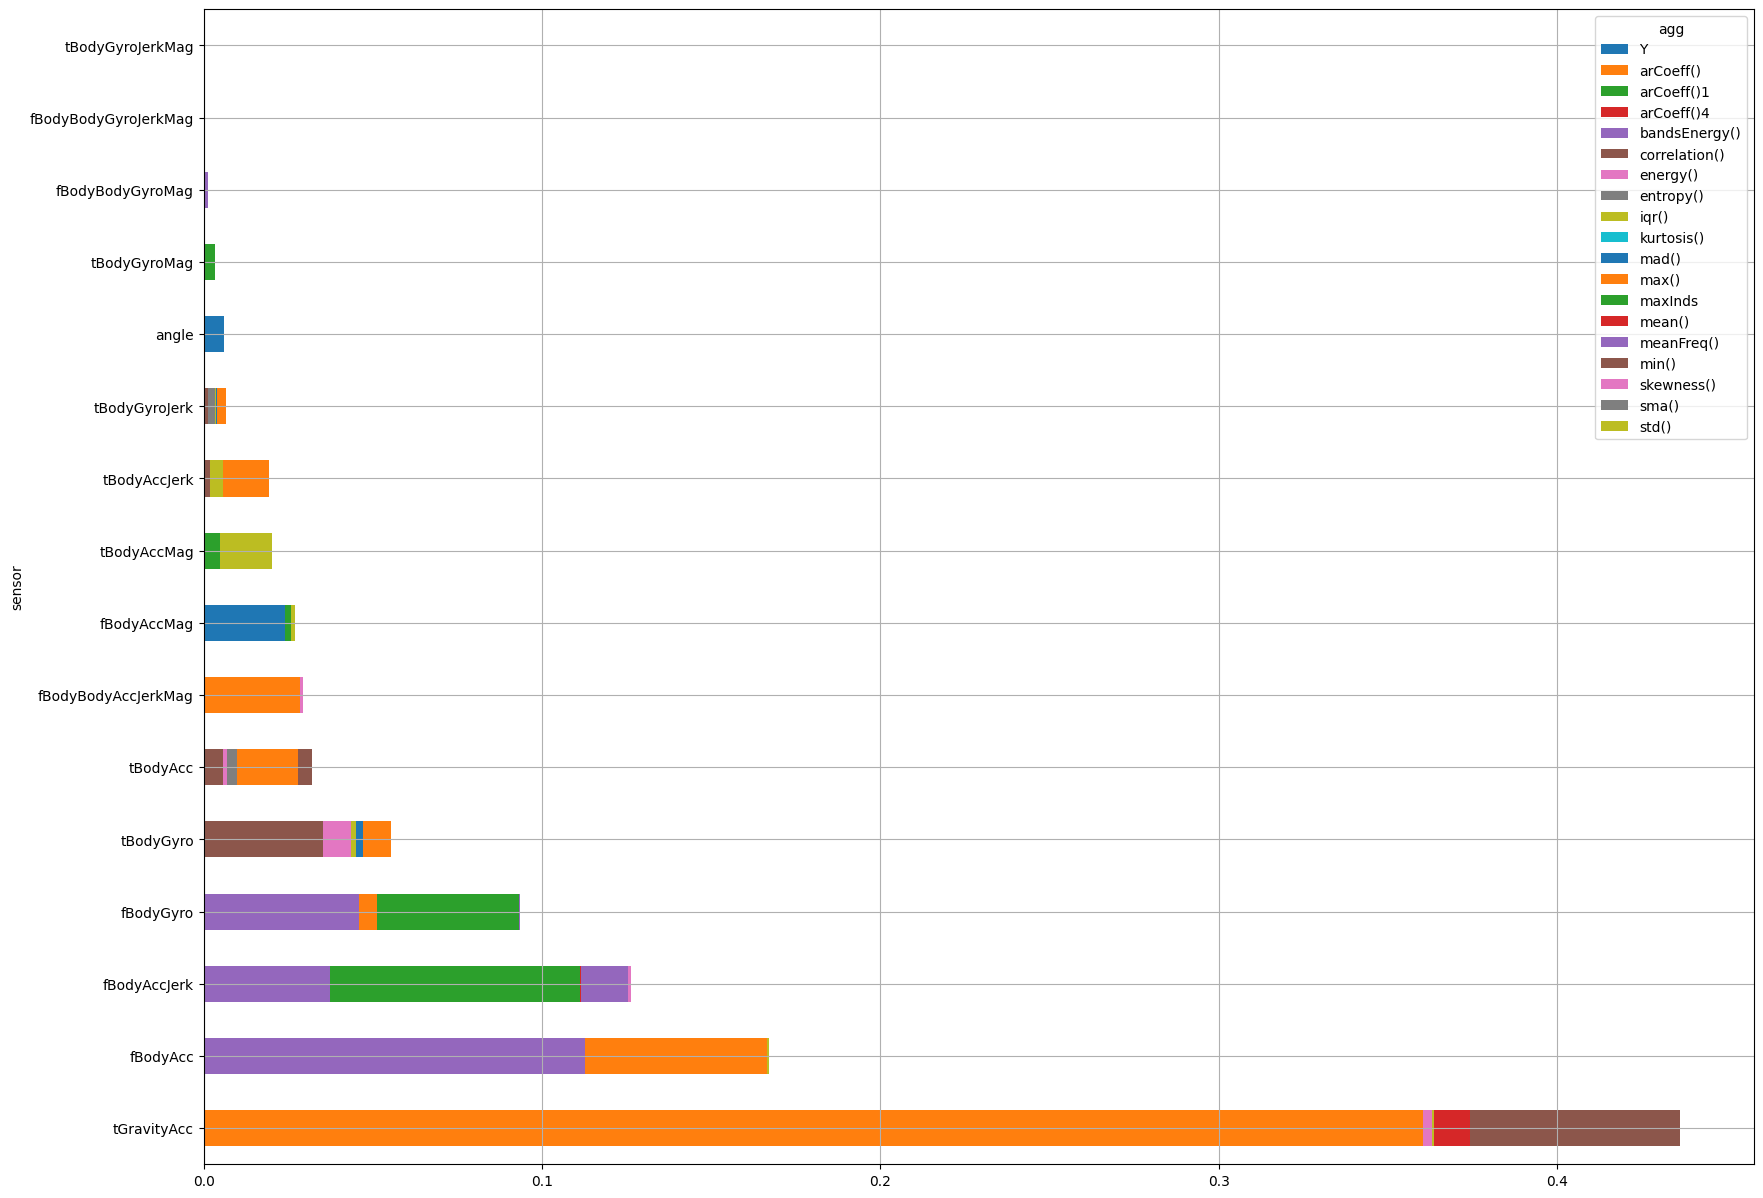

In [39]:
# 누적 막대 그래프 시각화
# acc 변수를 sensor 별 수평 그래프로 시각화 합니다.

acc.plot(kind='barh', stacked=True, figsize=(20,15))
plt.grid()
plt.show()



---
---

## <실전미션> Activity 예측하기


* 단말기 개발팀에서 최근에 Fine-Watch에서 수집한 real 데이터를 보내 주었습니다. 이 데이터에는 Activity 정보가 없습니다. 어느 'subject' 열이 'WALKING_UPSTAIRS' 데이터인지 Activity를 분류해서 결과를 단말기 개발팀 메일에 함께 보내 주세요.

In [40]:
## real_data.csv 파일을 불러와서 real_data 변수에 할당 합니다.
## 잘 할당 되었는지 데이터 확인

real_data = pd.read_csv('./data/real_data.csv')
real_data



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.064073,-0.005123,-0.271555,-0.231952,0.593444,0.833666,-0.293844,0.603777,0.906303,-0.203098,...,-0.317461,-0.703020,0.075952,-0.648670,-0.838078,0.407393,-0.327642,0.312526,0.431085,1
1,-0.239103,-0.096904,0.148035,-0.637325,-0.127692,-0.258924,-0.643642,-0.138551,-0.239634,-0.878149,...,-0.157009,-0.561918,0.002418,-0.002366,-0.101878,0.543207,0.378792,-0.488443,-0.487057,2
2,-0.181394,0.324130,0.129390,-0.867258,-0.581496,-0.777242,-0.885160,-0.575035,-0.748065,-0.971348,...,-0.528134,-0.884218,0.106616,0.579102,0.082680,-0.075495,-0.638803,-0.024623,-0.208879,3
3,-0.166426,-0.119353,0.133035,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,...,0.196038,-0.128895,0.139475,0.039216,-0.495303,0.082696,0.272083,-0.534122,-0.397428,4
4,-0.161088,-0.028160,-0.209931,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,...,-0.609554,-0.864934,0.621322,-0.820087,0.351063,0.193917,-0.729349,0.208647,0.174249,5
5,-0.107530,0.013312,1.000000,-0.835146,-0.600036,-0.356636,-0.836418,-0.550924,-0.307091,-0.943929,...,-0.323623,-0.709580,0.142569,0.612084,-0.078512,0.002076,0.355207,-0.783544,0.169957,6
6,0.058595,-0.050059,-0.167108,-0.223698,0.110078,-0.094274,-0.248771,0.062721,-0.119843,-0.232788,...,-0.477556,-0.801206,0.368073,0.435915,-0.935362,-0.041572,-0.506027,0.364035,0.229471,7
7,0.062631,-0.062839,-0.334600,-0.170677,-0.365133,0.099516,-0.210948,-0.404148,0.103444,0.092464,...,0.207791,-0.149349,0.041817,0.121594,0.967539,-0.117698,-0.536821,0.207750,0.328708,8
8,0.069324,-0.007338,-0.161523,-0.090053,0.000301,0.243752,-0.232309,-0.026293,0.034870,0.321941,...,-0.132151,-0.476123,0.669298,0.037212,0.906914,0.502852,-0.827640,0.155705,0.127148,9
9,-0.466440,-0.618098,0.948795,-0.789764,-0.057348,-0.352774,-0.803030,0.063835,-0.302126,-0.953206,...,-0.399706,-0.728500,0.166498,0.611890,-0.002655,-0.018370,0.694861,-0.692058,-0.297937,10


In [41]:
## real_data 변수(데이터셋)에서 행동분류에 불필요한 'subject'열 제거한 데이터를 real_x_val 변수에 할당 합니다.
## 나중에 예측 결과를 real_data 데이터 프레임에 병합해서 결과를 확인해야 하므로 real_data 변수에서 'subject'열 제거하지 마세요.

real_x_val = real_data.drop('subject', axis=1)
real_x_val

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.064073,-0.005123,-0.271555,-0.231952,0.593444,0.833666,-0.293844,0.603777,0.906303,-0.203098,...,-0.046164,-0.317461,-0.703020,0.075952,-0.648670,-0.838078,0.407393,-0.327642,0.312526,0.431085
1,-0.239103,-0.096904,0.148035,-0.637325,-0.127692,-0.258924,-0.643642,-0.138551,-0.239634,-0.878149,...,-0.691219,-0.157009,-0.561918,0.002418,-0.002366,-0.101878,0.543207,0.378792,-0.488443,-0.487057
2,-0.181394,0.324130,0.129390,-0.867258,-0.581496,-0.777242,-0.885160,-0.575035,-0.748065,-0.971348,...,-0.206895,-0.528134,-0.884218,0.106616,0.579102,0.082680,-0.075495,-0.638803,-0.024623,-0.208879
3,-0.166426,-0.119353,0.133035,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,...,-0.800684,0.196038,-0.128895,0.139475,0.039216,-0.495303,0.082696,0.272083,-0.534122,-0.397428
4,-0.161088,-0.028160,-0.209931,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,...,0.458379,-0.609554,-0.864934,0.621322,-0.820087,0.351063,0.193917,-0.729349,0.208647,0.174249
5,-0.107530,0.013312,1.000000,-0.835146,-0.600036,-0.356636,-0.836418,-0.550924,-0.307091,-0.943929,...,-0.007533,-0.323623,-0.709580,0.142569,0.612084,-0.078512,0.002076,0.355207,-0.783544,0.169957
6,0.058595,-0.050059,-0.167108,-0.223698,0.110078,-0.094274,-0.248771,0.062721,-0.119843,-0.232788,...,0.486601,-0.477556,-0.801206,0.368073,0.435915,-0.935362,-0.041572,-0.506027,0.364035,0.229471
7,0.062631,-0.062839,-0.334600,-0.170677,-0.365133,0.099516,-0.210948,-0.404148,0.103444,0.092464,...,0.179968,0.207791,-0.149349,0.041817,0.121594,0.967539,-0.117698,-0.536821,0.207750,0.328708
8,0.069324,-0.007338,-0.161523,-0.090053,0.000301,0.243752,-0.232309,-0.026293,0.034870,0.321941,...,0.066485,-0.132151,-0.476123,0.669298,0.037212,0.906914,0.502852,-0.827640,0.155705,0.127148
9,-0.466440,-0.618098,0.948795,-0.789764,-0.057348,-0.352774,-0.803030,0.063835,-0.302126,-0.953206,...,0.008963,-0.399706,-0.728500,0.166498,0.611890,-0.002655,-0.018370,0.694861,-0.692058,-0.297937


In [42]:
## real_x_val 데이터에서 최고의 성능을 내는 학습 feature 데이터를 real_x_top 변수에 할당합니다.
## Feature Selection 된 상위 중요 feature 명 리스트는 up_importance_top 변수를 사용 합니다.

real_x_top = real_x_val[up_importance_top]

In [43]:
## walkingup_top 모델로 real_x_top 데이터의 'WALKING_UPSTAIRS' 행동분류 예측해서 real_walkingup_pred 변수에 할당 합니다.

real_walkingup_pred = walkingup_top_model.predict(real_x_top)
real_walkingup_pred


array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [44]:
## real_data['WALKING_UPSTAIRS'] 열에 real_walkingup_pred 예측 결과를 할당 하고, 데이터를 확인 합니다.

real_data['WALKING_UPSTAIRS'] = real_walkingup_pred
real_data



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,WALKING_UPSTAIRS
0,0.064073,-0.005123,-0.271555,-0.231952,0.593444,0.833666,-0.293844,0.603777,0.906303,-0.203098,...,-0.703020,0.075952,-0.648670,-0.838078,0.407393,-0.327642,0.312526,0.431085,1,1
1,-0.239103,-0.096904,0.148035,-0.637325,-0.127692,-0.258924,-0.643642,-0.138551,-0.239634,-0.878149,...,-0.561918,0.002418,-0.002366,-0.101878,0.543207,0.378792,-0.488443,-0.487057,2,0
2,-0.181394,0.324130,0.129390,-0.867258,-0.581496,-0.777242,-0.885160,-0.575035,-0.748065,-0.971348,...,-0.884218,0.106616,0.579102,0.082680,-0.075495,-0.638803,-0.024623,-0.208879,3,0
3,-0.166426,-0.119353,0.133035,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,...,-0.128895,0.139475,0.039216,-0.495303,0.082696,0.272083,-0.534122,-0.397428,4,0
4,-0.161088,-0.028160,-0.209931,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,...,-0.864934,0.621322,-0.820087,0.351063,0.193917,-0.729349,0.208647,0.174249,5,0
5,-0.107530,0.013312,1.000000,-0.835146,-0.600036,-0.356636,-0.836418,-0.550924,-0.307091,-0.943929,...,-0.709580,0.142569,0.612084,-0.078512,0.002076,0.355207,-0.783544,0.169957,6,0
6,0.058595,-0.050059,-0.167108,-0.223698,0.110078,-0.094274,-0.248771,0.062721,-0.119843,-0.232788,...,-0.801206,0.368073,0.435915,-0.935362,-0.041572,-0.506027,0.364035,0.229471,7,1
7,0.062631,-0.062839,-0.334600,-0.170677,-0.365133,0.099516,-0.210948,-0.404148,0.103444,0.092464,...,-0.149349,0.041817,0.121594,0.967539,-0.117698,-0.536821,0.207750,0.328708,8,1
8,0.069324,-0.007338,-0.161523,-0.090053,0.000301,0.243752,-0.232309,-0.026293,0.034870,0.321941,...,-0.476123,0.669298,0.037212,0.906914,0.502852,-0.827640,0.155705,0.127148,9,0
9,-0.466440,-0.618098,0.948795,-0.789764,-0.057348,-0.352774,-0.803030,0.063835,-0.302126,-0.953206,...,-0.728500,0.166498,0.611890,-0.002655,-0.018370,0.694861,-0.692058,-0.297937,10,0


In [45]:
# 인덱스 미포함 real_data 변수를 real_result.csv 파일로 저장 합니다.

real_data.to_csv('real_result.csv', index=False)


In [46]:
# 잘 저장 되었는지 확인 합니다.

pd.read_csv('real_result.csv')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,WALKING_UPSTAIRS
0,0.064073,-0.005123,-0.271555,-0.231952,0.593444,0.833666,-0.293844,0.603777,0.906303,-0.203098,...,-0.703020,0.075952,-0.648670,-0.838078,0.407393,-0.327642,0.312526,0.431085,1,1
1,-0.239103,-0.096904,0.148035,-0.637325,-0.127692,-0.258924,-0.643642,-0.138551,-0.239634,-0.878149,...,-0.561918,0.002418,-0.002366,-0.101878,0.543207,0.378792,-0.488443,-0.487057,2,0
2,-0.181394,0.324130,0.129390,-0.867258,-0.581496,-0.777242,-0.885160,-0.575035,-0.748065,-0.971348,...,-0.884218,0.106616,0.579102,0.082680,-0.075495,-0.638803,-0.024623,-0.208879,3,0
3,-0.166426,-0.119353,0.133035,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,...,-0.128895,0.139475,0.039216,-0.495303,0.082696,0.272083,-0.534122,-0.397428,4,0
4,-0.161088,-0.028160,-0.209931,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,...,-0.864934,0.621322,-0.820087,0.351063,0.193917,-0.729349,0.208647,0.174249,5,0
5,-0.107530,0.013312,1.000000,-0.835146,-0.600036,-0.356636,-0.836418,-0.550924,-0.307091,-0.943929,...,-0.709580,0.142569,0.612084,-0.078512,0.002076,0.355207,-0.783544,0.169957,6,0
6,0.058595,-0.050059,-0.167108,-0.223698,0.110078,-0.094274,-0.248771,0.062721,-0.119843,-0.232788,...,-0.801206,0.368073,0.435915,-0.935362,-0.041572,-0.506027,0.364035,0.229471,7,1
7,0.062631,-0.062839,-0.334600,-0.170677,-0.365133,0.099516,-0.210948,-0.404148,0.103444,0.092464,...,-0.149349,0.041817,0.121594,0.967539,-0.117698,-0.536821,0.207750,0.328708,8,1
8,0.069324,-0.007338,-0.161523,-0.090053,0.000301,0.243752,-0.232309,-0.026293,0.034870,0.321941,...,-0.476123,0.669298,0.037212,0.906914,0.502852,-0.827640,0.155705,0.127148,9,0
9,-0.466440,-0.618098,0.948795,-0.789764,-0.057348,-0.352774,-0.803030,0.063835,-0.302126,-0.953206,...,-0.728500,0.166498,0.611890,-0.002655,-0.018370,0.694861,-0.692058,-0.297937,10,0


---
---

### [파이널 미션] 결과 메일 발송

* 수신자: aivleschool.dx@gmail.com

----------

# 수고하셨습니다

----------